In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import re
#from scipy.optimize import curve_fit
#import mdtraj as md
import os

In [2]:
def dir_to_trajs(directory):
    """
    loads atom positions from all LAMMPS files in given directory
    
    input directory: path of directory e.g. run3-100_dumplin (string)
    output: positions of all atoms at different times (numpy array) 
    """
    a = []
    # iterate over files in
    # that directory
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        # checking if it is a file: 
        if os.path.isfile(f):
            a.append(np.loadtxt(f, skiprows=9, usecols=(1,2,3)))
    return np.asarray(a[-round(len(a)/2):])

In [3]:
def calcMSDs(directory,delta=1,samplesize=100):
    trajs = dir_to_trajs(directory)
    MSDs = []
    errs = []
    for gendist in range(1,trajs.shape[1],delta):
        a = []
        try:
            refatoms = np.random.choice(range(trajs.shape[1]-gendist), size=samplesize, replace=False)
        except:
            refatoms = range(trajs.shape[1]-gendist)
        for atom1 in refatoms:
            temp = trajs[:,atom1]-trajs[:,atom1+gendist]
            a.append(np.linalg.norm(temp, axis=1)**2)
        allSDs = np.asarray(a)
        MSD, err = np.mean(allSDs), np.std(allSDs, ddof=1) / np.sqrt(np.size(allSDs))
        MSDs.append(MSD)
        errs.append(err)
    return np.asarray(MSDs), np.asarray(errs)

In [4]:
def plotMSDs(directory,delta=1,samplesize=100):
    MSDs, errs = calcMSDs(directory,delta,samplesize)
    
    gendists = delta*np.arange(1, len(MSDs)+1)
    
    plt.title(r'MSD $\left\langle r^2 \right\rangle$ as a function of genomic distance')
    plt.xlabel(r'Genomic distance [kbp]')
    plt.ylabel(r'$\left\langle r^2 \right\rangle$')
    plt.errorbar(gendists, MSDs, yerr=errs, fmt=',', linestyle='None') # pixel marker and no line
    plt.grid()
    plt.tight_layout()
    #plt.savefig('plots/'+'MSDvsgendist_'+directory+'_delta'+str(delta)+'_ssize'+str(samplesize)+'.pdf', format='pdf')
    plt.show()

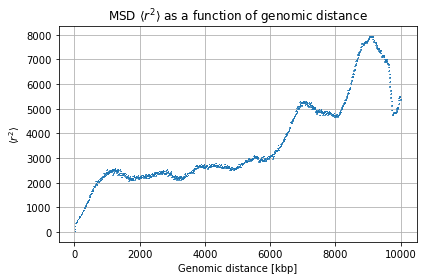

Wall time: 15.1 s


In [5]:
%%time
directory = 'dumplin10000'
delta = 10 # difference in gendist between adjacent data points in the plot
samplesize = 1000 # No of randomly chosen pairs of atoms from which MSD is calculated for each gendist
plotMSDs(directory,delta,samplesize)